In [6]:
# --- about
# this file calls bootstrap() in spectra_ml to run bootstrap runs

In [7]:
# --- set up 

# local
import spectra_ml     #make sure path is specified in computer
from spectra_ml import metrics

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# for Set working folder, etc.
import os
import os.path


In [8]:
# --- put spectrum files into variables

# turn files into lists and cut off first line
# put into database "spectra"
# turn deleted points (flagged as -1.23e+34) into 0's
# label spectra with datafile titles


# - init spectra and class databases
datafolder = "C:/Users/Bonita/Documents/GitHub/spectra-ml/data/dataset3"
num_samples = len([name for name in os.listdir(datafolder) if \
                   os.path.isfile(os.path.join(datafolder,name))])
# test code 
# print(num_samples)

spectrum_len = 480                                 # 480 >= the BECK spectrometer spectrum length
spectra = np.zeros((num_samples,spectrum_len))
spectrum_categories = np.zeros(num_samples)
first_record_of_mixtures_chapter = 11602
is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
is_a_mixture = 2
spectrum_names = ["" for x in range(num_samples)]

y = np.zeros((num_samples, 1))


# - fill databases
i = 0

# find spectra folder
os.chdir(datafolder)

# - etl the data
# - create a spectrum_names string matrix for populating the plot legends
# - find record number for identifying mixtures, which will be plotted in thicker lines
for filename in os.listdir(datafolder):
    
    # read file
    file_object  = open(filename, 'r').readlines()
    # strip off header, add to matrix 'spectra'
    spectra[i,:] = file_object[1:]                  
    
    # find file header
    file_header = file_object[0]             
                                        
    # make spectrum_names matrix to label spectra in the plot legends
    spectrum_names[i] = file_header
    
    # categorize spectrum as mineral or mixture:
    # find record number in the header 
    # change from string to integer
    # use it to identify and label minerals versus mixtures
    # (minerals are records <=first_record_of_mixtures_chapter)
    # (see report pg 3 from https://pubs.er.usgs.gov/publication/ds1035 
    # ...for list of categories, 'chapters')
    # (*will need to update if we want to use and categorize spectra from other categories)
    # store category in spectra_category
    ####
    start = 'Record='
    end = ':'
    record_number = int((file_header.split(start))[1].split(end)[0])
    # print(record_number)
    if record_number < first_record_of_mixtures_chapter:
        spectrum_categories[i] = is_a_mineral
    else:
        spectrum_categories[i] = is_a_mixture
        
    # testcode
    # print('record_number: ', record_number)
    
    # testcode
    # print(spectrum_categories)
    
    # testcode
    # print(file_header)
    
    # label spectrum class, based on header
    # actinolite: 0, alunite: 1, chlorite: 2
    if file_header.find('Actinolite',)!= -1: #if material name contains actinolite
        y[i,0] = 0
    elif file_header.find('Alun',)!= -1:
        y[i,0] = 1
    else:                                       #chlorite
        y[i,0] = 2         
               
    # turn deleted points into 0
    for j in range(spectrum_len):  
        if spectra[i,j] <0:
            spectra[i,j]=0                          
    i+=1

# test code
# print(y[:])
# print(spectra[0:2,0])

#print(type(spectra))
#print(type(y))

# convert to dataframes
#spectra = pd.DataFrame(spectra)
#y = pd.DataFrame(y)

#print(y.at[0,0])
#print(y[0,0])
#print(y.shape)

In [9]:
# --- 'backwards compatibility'

raw_spectra = spectra
raw_labels = y
raw_len = spectrum_len

In [10]:
# --- implement standardized data

# set folder
std_datafolder = "C:/Users/Bonita/Documents/GitHub/spectra-ml/data/ASCIIdata_splib07a.standardized"
os.chdir(std_datafolder)

# y

metadata_file  = 'spectra-metadata.csv'
labels_data = open(metadata_file, 'r').readlines()

# spectra


In [11]:
itrain,idev,itest = metrics.split(num_samples)
train_population_indices = itrain
dev_population_indices = idev
test_population_indices = itest

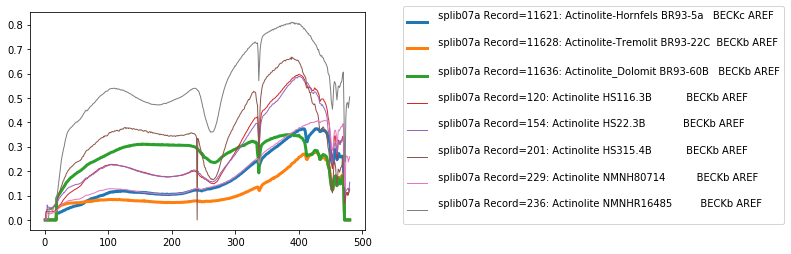

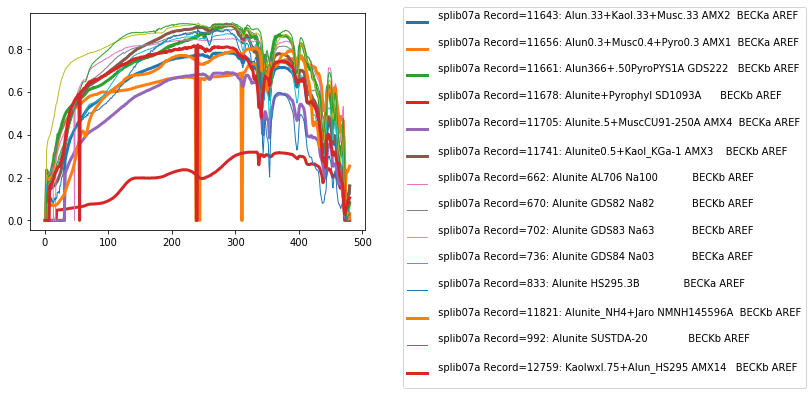

In [12]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
    if spectrum_categories[i] == is_a_mineral:
        linewidth = mineral_linewidth
        
        #testcode
        #print('min')
    else: 
        linewidth = mixture_linewidth
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
    plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
    plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
    plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()  

In [13]:
# --- classplot(spectra, labels)

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

def classplot(spectradata, labels, legend_names):

    # variables
    y = labels
    spectra = spectradata
    spectrum_names = legend_names            
    num_samples = len(spectra)
    
    num0 = 0 #number of samples of class 0
    num1 = 0
    num2 = 0

    mineral_linewidth = 1         # linewidth = 1 is default
    mixture_linewidth = 3         

    # count the number of each class to make spectra0, spectra1, spectra2 databases
    for i in range(num_samples):
        if y[i,0]== 0:
            num0 += 1
        elif y[i,0]== 1:
            num1 += 1
        elif y[i,0]== 2:
            num2 += 1

    # make class-specific databases spectra0, ...1, ...2
    spectra0 = np.zeros((num0,spectrum_len)) 
    spectra1 = np.zeros((num1,spectrum_len)) 
    spectra2 = np.zeros((num2,spectrum_len)) 

    labels0 = ["" for x in range(num0)]
    labels1 = ["" for x in range(num1)]
    labels2 = ["" for x in range(num2)]

    linewidth0 = np.zeros(num0)
    linewidth1 = np.zeros(num1)
    linewidth2 = np.zeros(num2)


    # make counters for each database to place spectra
    i0 = 0
    i1 = 0
    i2 = 0

    # set linewidth for the spectrum 
    # populate class-specific databases spectra0, ...1, ...2
    for i in range(num_samples):

        # set linewidth
        #testcode
        #print(spectrum_categories)
        #print(spectrum_categories[i])

        if spectrum_categories[i] == is_a_mineral:
            linewidth = mineral_linewidth

            #testcode
            #print('min')
        else: 
            linewidth = mixture_linewidth

            #testcode
            #print('mix')

        # populate matrices for making each class plot
        if y[i,0]== 0:
            spectra0[i0,:] = spectra[i,:]
            labels0[i0] = spectrum_names[i]
            linewidth0[i0] = linewidth
            i0 +=1
        elif y[i,0]== 1:
            spectra1[i1,:] = spectra[i,:]
            labels1[i1] = spectrum_names[i]
            linewidth1[i1] = linewidth
            i1 +=1
        else:
            spectra2[i2,:] = spectra[i,:]
            labels2[i2] = spectrum_names[i]
            linewidth2[i2] = linewidth
            i2 +=1

    # plot each class-specific database separately
    for i in range(i0):
        plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

    for i in range(i1):
        plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

    for i in range(i2):
        plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()  

In [14]:
# --- test model 
# aggregate

# test once each on dev and test set
# model will be trained on the whole train population
# (test cell comes before bootstrap cell bc bootstrap takes much longer)

# make train, dev and test sets
train_set = spectra[train_population_indices, :]
train_set_labels = y[train_population_indices, :]
train_set_names = ["" for x in range(len(train_set))]
for i in range(len(train_population_indices)): 
    train_set_names[i] = spectrum_names[train_population_indices[i]]
    
dev_set = spectra[dev_population_indices, :]
dev_set_labels = y[dev_population_indices,:]
dev_set_names = ["" for x in range(len(dev_set))]
for i in range(len(dev_population_indices)): 
    dev_set_names[i] = spectrum_names[dev_population_indices[i]]
    
test_set = spectra[test_population_indices, :]
test_set_labels = y[test_population_indices, :]
test_set_names = ["" for x in range(len(test_set))]
for i in range(len(test_population_indices)): 
    test_set_names[i] = spectrum_names[test_population_indices[i]]

# train, validate and test model
num_epochs = 50

model = keras.Sequential([
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.train.AdamOptimizer(), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# train
History = model.fit(train_set, train_set_labels, epochs=num_epochs)

epoch_accs = History.history['acc']
train_acc = epoch_accs[num_epochs-1]   #record final epoch, plain nn train result, acc[...]), for each run

# test on dev set
dev_loss, dev_acc = model.evaluate(dev_set, dev_set_labels)

# test on test set
test_loss, test_acc = model.evaluate(test_set, test_set_labels)
    
# see and save results
print(train_acc, dev_acc)


Epoch 1/50
21/21 [==============================] - 1s 42ms/step - loss: 1.1066 - acc: 0.3333
Epoch 2/50
21/21 [==============================] - 0s 906us/step - loss: 0.9690 - acc: 0.3333
Epoch 3/50
21/21 [==============================] - 0s 619us/step - loss: 0.9193 - acc: 0.3333
Epoch 4/50
21/21 [==============================] - 0s 620us/step - loss: 0.8369 - acc: 0.5714
Epoch 5/50
21/21 [==============================] - 0s 429us/step - loss: 0.7891 - acc: 0.7143
Epoch 6/50
21/21 [==============================] - 0s 238us/step - loss: 0.7431 - acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 333us/step - loss: 0.6966 - acc: 0.7143
Epoch 8/50
21/21 [==============================] - 0s 238us/step - loss: 0.6598 - acc: 0.8571
Epoch 9/50
21/21 [==============================] - 0s 381us/step - loss: 0.6248 - acc: 0.8571
Epoch 10/50
21/21 [==============================] - 0s 381us/step - loss: 0.5942 - acc: 0.8571
Epoch 11/50
21/21 [==============================]

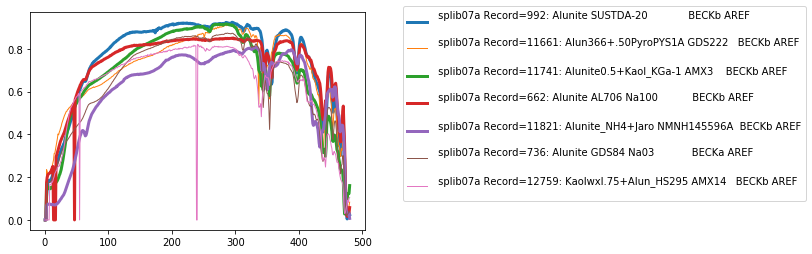

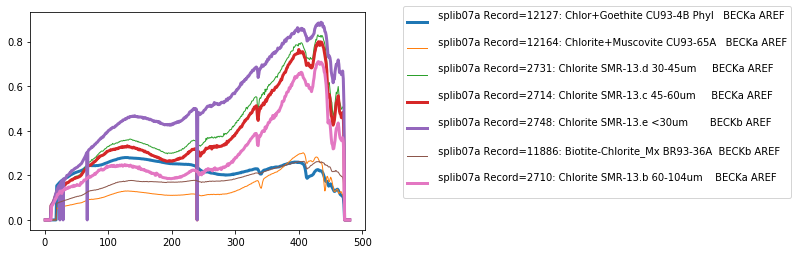

No handles with labels found to put in legend.


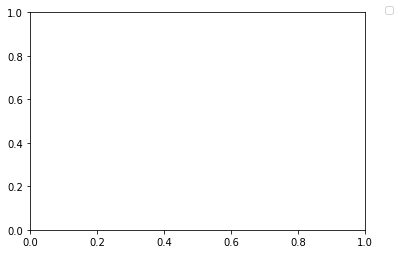

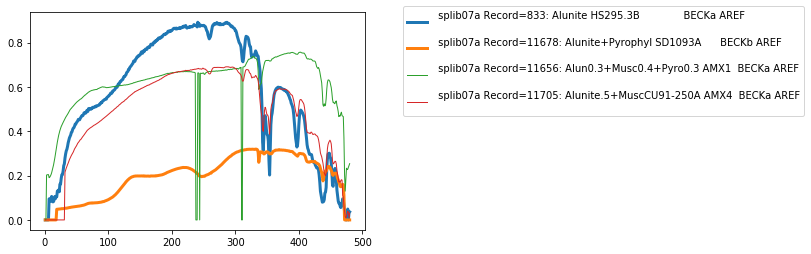

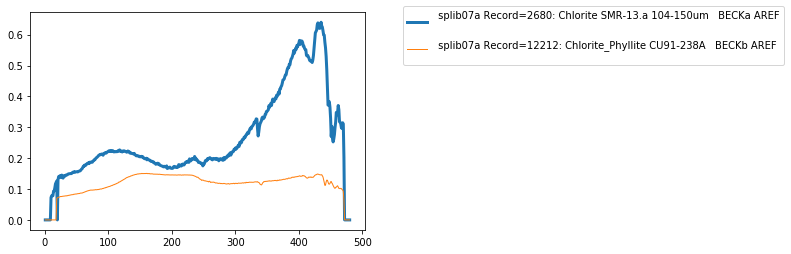

In [15]:
# plot the train and dev data

classplot(train_set, train_set_labels, train_set_names)
classplot(dev_set, dev_set_labels, dev_set_names)

# comment
# to plot all classes as before, 
# use:
# classplot(spectra, y)

In [16]:
# run bootstrap

# bootstrap works by sampling with replacement from the train population to generate train sets 
# it then fits a model to each of the new sets
# and prints out some stats about the average and standard deviation of the bootstrap models' performance

# reference: elements of statistical learning by hastie, tibshirani, friedman (free textbook)

In [17]:
# use bootstrap(model, data, data_labels, num_epochs)
num_bootstrap_runs = 100
batch_size = 12
bresults = spectra_ml.metrics.bootstrap2(model, spectra, y, num_epochs, batch_size, num_bootstrap_runs)
print(bresults)

Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0592 - acc: 1.0000 - val_loss: 0.9091 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 952us/step - loss: 0.0742 - acc: 0.9524 - val_loss: 0.6829 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 715us/step - loss: 0.0307 - acc: 1.0000 - val_loss: 0.9719 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0492 - acc: 1.0000 - val_loss: 0.6712 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 524us/step - loss: 0.0855 - acc: 0.9524 - val_loss: 0.7191 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 762us/step - loss: 0.0299 - acc: 1.0000 - val_loss: 1.1257 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 714us/step - loss: 0.0435 - acc: 1.0000 - val_loss: 0.7365 - val_acc: 0.6667
Epoch 8/50
21/21 [===================

21/21 [==============================] - 0s 1ms/step - loss: 0.0131 - acc: 1.0000 - val_loss: 0.3326 - val_acc: 0.8333
Epoch 13/50
21/21 [==============================] - 0s 762us/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.1862 - val_acc: 0.8333
Epoch 14/50
21/21 [==============================] - 0s 810us/step - loss: 0.0525 - acc: 1.0000 - val_loss: 0.1201 - val_acc: 1.0000
Epoch 15/50
21/21 [==============================] - 0s 762us/step - loss: 0.0883 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 1.0000
Epoch 16/50
21/21 [==============================] - 0s 905us/step - loss: 0.0612 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 1.0000
Epoch 17/50
21/21 [==============================] - 0s 714us/step - loss: 0.0574 - acc: 1.0000 - val_loss: 0.0965 - val_acc: 1.0000
Epoch 18/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0392 - acc: 1.0000 - val_loss: 0.1279 - val_acc: 1.0000
Epoch 19/50
21/21 [==============================] - 0s 857us/step - loss: 0.0202 - a

21/21 [==============================] - 0s 714us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4626 - val_acc: 0.8333
Epoch 24/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4380 - val_acc: 0.8333
Epoch 25/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.4374 - val_acc: 0.8333
Epoch 26/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.4409 - val_acc: 0.8333
Epoch 27/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.4619 - val_acc: 0.8333
Epoch 28/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.5024 - val_acc: 0.8333
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.5472 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 714us/step - loss: 0.0093 - acc: 1.00

21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.5176 - val_acc: 0.8333
Epoch 35/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.5191 - val_acc: 0.8333
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.5117 - val_acc: 0.8333
Epoch 37/50
21/21 [==============================] - 0s 810us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.5048 - val_acc: 0.8333
Epoch 38/50
21/21 [==============================] - 0s 571us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4984 - val_acc: 0.8333
Epoch 39/50
21/21 [==============================] - 0s 429us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4932 - val_acc: 0.8333
Epoch 40/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4916 - val_acc: 0.8333
Epoch 41/50
21/21 [==============================] - 0s 762us/step - loss: 0.0026 - acc: 

21/21 [==============================] - 0s 1ms/step - loss: 2.4514e-04 - acc: 1.0000 - val_loss: 0.7028 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 3ms/step - loss: 2.4040e-04 - acc: 1.0000 - val_loss: 0.7052 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 1ms/step - loss: 2.3664e-04 - acc: 1.0000 - val_loss: 0.7062 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 2.3361e-04 - acc: 1.0000 - val_loss: 0.7100 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 1ms/step - loss: 2.2987e-04 - acc: 1.0000 - val_loss: 0.7077 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 1ms/step - loss: 2.2581e-04 - acc: 1.0000 - val_loss: 0.7092 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 334us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 2ms/step - loss: 2.0030 - acc: 0.8571 -

Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1315 - acc: 0.9524 - val_loss: 0.6460 - val_acc: 0.8333
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0334 - acc: 1.0000 - val_loss: 0.7178 - val_acc: 0.8333
Epoch 6/50
21/21 [==============================] - 0s 762us/step - loss: 0.1299 - acc: 0.9524 - val_loss: 0.8194 - val_acc: 0.8333
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1095 - acc: 0.9524 - val_loss: 0.6544 - val_acc: 0.8333
Epoch 8/50
21/21 [==============================] - 0s 905us/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.7866 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0365 - acc: 1.0000 - val_loss: 1.1057 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0846 - acc: 0.9524 - val_loss: 0.6592 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0390 - acc

21/21 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.7357 - val_acc: 0.8333
Epoch 16/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.7574 - val_acc: 0.8333
Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.7770 - val_acc: 0.8333
Epoch 18/50
21/21 [==============================] - 0s 762us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.7919 - val_acc: 0.8333
Epoch 19/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.8015 - val_acc: 0.8333
Epoch 20/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.8072 - val_acc: 0.8333
Epoch 21/50
21/21 [==============================] - 0s 952us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.8033 - val_acc: 0.8333
Epoch 22/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0038 - acc: 1.00

Epoch 26/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.9059 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 953us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9083 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 952us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9142 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 905us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9190 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9217 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9237 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 952us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9258 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 1ms/step - loss: 0.

21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8773 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8808 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8815 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8841 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8904 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.8938 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 619us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.9001 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000

21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.8988 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 476us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.9021 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 500us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5915 - acc: 0.9048 - val_loss: 0.7066 - val_acc: 0.8333
Epoch 2/50
21/21 [==============================] - 0s 810us/step - loss: 0.1721 - acc: 0.9048 - val_loss: 0.2487 - val_acc: 0.8333
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0783 - acc: 0.9524 - val_loss: 0.2344 - val_acc: 0.8333
Epoch 4/50
21/21 [==============================] - 0s 714us/step - loss: 0.1841 - acc: 0.9048 - val_loss: 0.6460 - val_acc: 0.8333
Epoch 5/50
21/21 [==============================] - 0s 714us/step - loss: 0.0898 - acc: 1.0000 - val_loss: 2.0969 - 

21/21 [==============================] - 0s 857us/step - loss: 2.5390e-04 - acc: 1.0000 - val_loss: 1.3006 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 1ms/step - loss: 2.1520e-04 - acc: 1.0000 - val_loss: 1.3617 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 1.9192e-04 - acc: 1.0000 - val_loss: 1.4209 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 762us/step - loss: 1.6747e-04 - acc: 1.0000 - val_loss: 1.4752 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 1.5169e-04 - acc: 1.0000 - val_loss: 1.5254 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3625e-04 - acc: 1.0000 - val_loss: 1.5702 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2303e-04 - acc: 1.0000 - val_loss: 1.6102 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 2ms/step

21/21 [==============================] - 0s 1ms/step - loss: 2.0609e-04 - acc: 1.0000 - val_loss: 2.3324 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 619us/step - loss: 2.0032e-04 - acc: 1.0000 - val_loss: 2.3480 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 762us/step - loss: 1.9565e-04 - acc: 1.0000 - val_loss: 2.3635 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 801us/step - loss: 1.8828e-04 - acc: 1.0000 - val_loss: 2.3779 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 2ms/step - loss: 1.8320e-04 - acc: 1.0000 - val_loss: 2.3920 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 2ms/step - loss: 1.7884e-04 - acc: 1.0000 - val_loss: 2.4058 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7294e-04 - acc: 1.0000 - val_loss: 2.4186 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 2ms/s

21/21 [==============================] - 0s 905us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.1024 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 905us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.0890 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 714us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.0858 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.0897 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 762us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.0968 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.1112 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.1293 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 

21/21 [==============================] - 0s 714us/step - loss: 2.9831e-05 - acc: 1.0000 - val_loss: 1.3536 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 2ms/step - loss: 2.9236e-05 - acc: 1.0000 - val_loss: 1.3575 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 619us/step - loss: 2.9014e-05 - acc: 1.0000 - val_loss: 1.3619 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8589e-05 - acc: 1.0000 - val_loss: 1.3660 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 524us/step - loss: 2.8191e-05 - acc: 1.0000 - val_loss: 1.3699 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 2ms/step - loss: 2.7726e-05 - acc: 1.0000 - val_loss: 1.3734 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 1ms/step - loss: 2.7380e-05 - acc: 1.0000 - val_loss: 1.3771 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 1ms/s

21/21 [==============================] - 0s 667us/step - loss: 5.5668e-04 - acc: 1.0000 - val_loss: 1.2598 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 5.5154e-04 - acc: 1.0000 - val_loss: 1.2589 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 952us/step - loss: 5.4747e-04 - acc: 1.0000 - val_loss: 1.2582 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 5.4432e-04 - acc: 1.0000 - val_loss: 1.2574 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 167us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 9.4433e-05 - acc: 1.0000 - val_loss: 1.2547 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 9.3292e-05 - acc: 1.0000 - val_loss: 1.2495 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 9.1596e-05 - acc: 1.

Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.4077 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 571us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.4147 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.3676 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.2910 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.2323 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.2058 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.2402 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 857us/step - loss: 0.0011 - ac

21/21 [==============================] - 0s 1ms/step - loss: 5.2180e-04 - acc: 1.0000 - val_loss: 1.1888 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 2ms/step - loss: 5.0532e-04 - acc: 1.0000 - val_loss: 1.2174 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 2ms/step - loss: 4.8691e-04 - acc: 1.0000 - val_loss: 1.2465 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 4.7883e-04 - acc: 1.0000 - val_loss: 1.2771 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 809us/step - loss: 4.8061e-04 - acc: 1.0000 - val_loss: 1.3077 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 619us/step - loss: 4.6801e-04 - acc: 1.0000 - val_loss: 1.3302 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 1ms/step - loss: 4.6488e-04 - acc: 1.0000 - val_loss: 1.3473 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 1ms/ste

21/21 [==============================] - 0s 1ms/step - loss: 1.6000e-05 - acc: 1.0000 - val_loss: 1.5326 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 1ms/step - loss: 1.5637e-05 - acc: 1.0000 - val_loss: 1.5385 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 952us/step - loss: 1.5518e-05 - acc: 1.0000 - val_loss: 1.5448 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 952us/step - loss: 1.5177e-05 - acc: 1.0000 - val_loss: 1.5507 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 429us/step - loss: 1.5075e-05 - acc: 1.0000 - val_loss: 1.5569 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 571us/step - loss: 1.4837e-05 - acc: 1.0000 - val_loss: 1.5629 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 1.4536e-05 - acc: 1.0000 - val_loss: 1.5684 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 714

Epoch 33/50
21/21 [==============================] - 0s 810us/step - loss: 3.7594e-04 - acc: 1.0000 - val_loss: 1.7195 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 1ms/step - loss: 3.7420e-04 - acc: 1.0000 - val_loss: 1.7185 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 2ms/step - loss: 3.6970e-04 - acc: 1.0000 - val_loss: 1.7178 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 762us/step - loss: 3.7122e-04 - acc: 1.0000 - val_loss: 1.7160 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 476us/step - loss: 3.6449e-04 - acc: 1.0000 - val_loss: 1.7177 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 857us/step - loss: 3.6213e-04 - acc: 1.0000 - val_loss: 1.7197 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 1ms/step - loss: 3.6078e-04 - acc: 1.0000 - val_loss: 1.7217 - val_acc: 0.6667
Epoch 40/50
21/21 [============================

Epoch 43/50
21/21 [==============================] - 0s 762us/step - loss: 6.0413e-04 - acc: 1.0000 - val_loss: 1.2794 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 619us/step - loss: 6.0173e-04 - acc: 1.0000 - val_loss: 1.2810 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 2ms/step - loss: 5.9801e-04 - acc: 1.0000 - val_loss: 1.2849 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 905us/step - loss: 5.9458e-04 - acc: 1.0000 - val_loss: 1.2870 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9044e-04 - acc: 1.0000 - val_loss: 1.2901 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 2ms/step - loss: 5.8642e-04 - acc: 1.0000 - val_loss: 1.2944 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8249e-04 - acc: 1.0000 - val_loss: 1.2974 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] 

Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 6.0527e-04 - acc: 1.000 - 0s 1ms/step - loss: 6.9626e-04 - acc: 1.0000 - val_loss: 1.3177 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 952us/step - loss: 6.0670e-04 - acc: 1.0000 - val_loss: 1.3174 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 4.7742e-04 - acc: 1.0000 - val_loss: 1.3294 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 3.4133e-04 - acc: 1.0000 - val_loss: 1.3488 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 2.9567e-04 - acc: 1.0000 - val_loss: 1.3771 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 2.3175e-04 - acc: 1.0000 - val_loss: 1.4075 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7840e-04 - acc: 1.0000 - val_loss: 1.4381 - val_acc: 0.6667
Epoch 9/50
21/21 [

21/21 [==============================] - 0s 1ms/step - loss: 6.2888e-04 - acc: 1.0000 - val_loss: 1.0935 - val_acc: 0.8333
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 5.5046e-04 - acc: 1.0000 - val_loss: 1.0819 - val_acc: 0.8333
Epoch 13/50
21/21 [==============================] - 0s 2ms/step - loss: 4.5623e-04 - acc: 1.0000 - val_loss: 1.0764 - val_acc: 0.8333
Epoch 14/50
21/21 [==============================] - 0s 2ms/step - loss: 4.0142e-04 - acc: 1.0000 - val_loss: 1.0767 - val_acc: 0.8333
Epoch 15/50
21/21 [==============================] - 0s 619us/step - loss: 3.8516e-04 - acc: 1.0000 - val_loss: 1.0839 - val_acc: 0.8333
Epoch 16/50
21/21 [==============================] - 0s 2ms/step - loss: 3.7168e-04 - acc: 1.0000 - val_loss: 1.0974 - val_acc: 0.8333
Epoch 17/50
21/21 [==============================] - 0s 571us/step - loss: 3.7278e-04 - acc: 1.0000 - val_loss: 1.1140 - val_acc: 0.8333
Epoch 18/50
21/21 [==============================] - 0s 1ms/ste

21/21 [==============================] - 0s 1ms/step - loss: 2.1908e-04 - acc: 1.0000 - val_loss: 1.2678 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 1ms/step - loss: 2.1729e-04 - acc: 1.0000 - val_loss: 1.2689 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1468e-04 - acc: 1.0000 - val_loss: 1.2695 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 952us/step - loss: 2.1350e-04 - acc: 1.0000 - val_loss: 1.2699 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 571us/step - loss: 2.1066e-04 - acc: 1.0000 - val_loss: 1.2704 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 2ms/step - loss: 2.0936e-04 - acc: 1.0000 - val_loss: 1.2704 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - ETA: 0s - loss: 2.0162e-04 - acc: 1.000 - 0s 476us/step - loss: 2.0698e-04 - acc: 1.0000 - val_loss: 1.2701 - val_acc: 0.6667
Epoch 27/50
21/21 [

21/21 [==============================] - 0s 523us/step - loss: 4.8408e-05 - acc: 1.0000 - val_loss: 1.3574 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 4.7943e-05 - acc: 1.0000 - val_loss: 1.3541 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 619us/step - loss: 4.7659e-05 - acc: 1.0000 - val_loss: 1.3506 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 2ms/step - loss: 4.7239e-05 - acc: 1.0000 - val_loss: 1.3466 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 524us/step - loss: 4.6921e-05 - acc: 1.0000 - val_loss: 1.3422 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 2ms/step - loss: 4.6450e-05 - acc: 1.0000 - val_loss: 1.3392 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 2ms/step - loss: 4.6206e-05 - acc: 1.0000 - val_loss: 1.3364 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 524us

Epoch 37/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3761e-04 - acc: 1.0000 - val_loss: 1.6398 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3601e-04 - acc: 1.0000 - val_loss: 1.6432 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 571us/step - loss: 1.3560e-04 - acc: 1.0000 - val_loss: 1.6475 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3488e-04 - acc: 1.0000 - val_loss: 1.6505 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3420e-04 - acc: 1.0000 - val_loss: 1.6522 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3350e-04 - acc: 1.0000 - val_loss: 1.6549 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3305e-04 - acc: 1.0000 - val_loss: 1.6567 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 

21/21 [==============================] - 0s 2ms/step - loss: 9.9287e-05 - acc: 1.0000 - val_loss: 1.4224 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 2ms/step - loss: 9.8947e-05 - acc: 1.0000 - val_loss: 1.4219 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 572us/step - loss: 9.8890e-05 - acc: 1.0000 - val_loss: 1.4223 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 762us/step - loss: 9.8499e-05 - acc: 1.0000 - val_loss: 1.4220 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 500us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 476us/step - loss: 9.2099e-05 - acc: 1.0000 - val_loss: 1.4225 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 9.1446e-05 - acc: 1.0000 - val_loss: 1.4229 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 810us/step - loss: 8.9636e-05 - acc

21/21 [==============================] - 0s 2ms/step - loss: 3.3284e-04 - acc: 1.0000 - val_loss: 1.5292 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 2.6114e-04 - acc: 1.0000 - val_loss: 1.5774 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 2.4447e-04 - acc: 1.0000 - val_loss: 1.6193 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 762us/step - loss: 2.3782e-04 - acc: 1.0000 - val_loss: 1.6419 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 810us/step - loss: 2.4119e-04 - acc: 1.0000 - val_loss: 1.6530 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 2.3705e-04 - acc: 1.0000 - val_loss: 1.6429 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 1ms/step - loss: 2.3110e-04 - acc: 1.0000 - val_loss: 1.6105 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 1ms/step - 

21/21 [==============================] - 0s 857us/step - loss: 1.2784e-04 - acc: 1.0000 - val_loss: 1.6057 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2399e-04 - acc: 1.0000 - val_loss: 1.6232 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 524us/step - loss: 1.1965e-04 - acc: 1.0000 - val_loss: 1.6400 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 1ms/step - loss: 1.1548e-04 - acc: 1.0000 - val_loss: 1.6557 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 571us/step - loss: 1.1371e-04 - acc: 1.0000 - val_loss: 1.6711 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - ETA: 0s - loss: 1.3528e-04 - acc: 1.000 - 0s 2ms/step - loss: 1.0971e-04 - acc: 1.0000 - val_loss: 1.6867 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 1ms/step - loss: 1.0478e-04 - acc: 1.0000 - val_loss: 1.7028 - val_acc: 0.6667
Epoch 21/50
21/21 [

21/21 [==============================] - 0s 1ms/step - loss: 5.4975e-05 - acc: 1.0000 - val_loss: 1.0572 - val_acc: 0.8333
Epoch 24/50
21/21 [==============================] - 0s 2ms/step - loss: 5.3495e-05 - acc: 1.0000 - val_loss: 1.0705 - val_acc: 0.8333
Epoch 25/50
21/21 [==============================] - 0s 2ms/step - loss: 4.9241e-05 - acc: 1.0000 - val_loss: 1.0825 - val_acc: 0.8333
Epoch 26/50
21/21 [==============================] - 0s 1ms/step - loss: 4.7721e-05 - acc: 1.0000 - val_loss: 1.0948 - val_acc: 0.8333
Epoch 27/50
21/21 [==============================] - 0s 905us/step - loss: 4.4663e-05 - acc: 1.0000 - val_loss: 1.1061 - val_acc: 0.8333
Epoch 28/50
21/21 [==============================] - 0s 1ms/step - loss: 4.3818e-05 - acc: 1.0000 - val_loss: 1.1177 - val_acc: 0.8333
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 4.2286e-05 - acc: 1.0000 - val_loss: 1.1286 - val_acc: 0.8333
Epoch 30/50
21/21 [==============================] - 0s 667us/ste

Epoch 32/50
21/21 [==============================] - 0s 2ms/step - loss: 1.4448e-04 - acc: 1.0000 - val_loss: 1.2364 - val_acc: 0.8333
Epoch 33/50
21/21 [==============================] - 0s 1ms/step - loss: 1.4376e-04 - acc: 1.0000 - val_loss: 1.2375 - val_acc: 0.8333
Epoch 34/50
21/21 [==============================] - 0s 714us/step - loss: 1.4321e-04 - acc: 1.0000 - val_loss: 1.2392 - val_acc: 0.8333
Epoch 35/50
21/21 [==============================] - 0s 2ms/step - loss: 1.4254e-04 - acc: 1.0000 - val_loss: 1.2401 - val_acc: 0.8333
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 1.4206e-04 - acc: 1.0000 - val_loss: 1.2406 - val_acc: 0.8333
Epoch 37/50
21/21 [==============================] - 0s 953us/step - loss: 1.4122e-04 - acc: 1.0000 - val_loss: 1.2412 - val_acc: 0.8333
Epoch 38/50
21/21 [==============================] - 0s 809us/step - loss: 1.4072e-04 - acc: 1.0000 - val_loss: 1.2416 - val_acc: 0.8333
Epoch 39/50
21/21 [==============================

21/21 [==============================] - 0s 2ms/step - loss: 1.3630e-04 - acc: 1.0000 - val_loss: 1.3094 - val_acc: 0.8333
Epoch 42/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3631e-04 - acc: 1.0000 - val_loss: 1.3105 - val_acc: 0.8333
Epoch 43/50
21/21 [==============================] - 0s 905us/step - loss: 1.3555e-04 - acc: 1.0000 - val_loss: 1.3111 - val_acc: 0.8333
Epoch 44/50
21/21 [==============================] - 0s 524us/step - loss: 1.3481e-04 - acc: 1.0000 - val_loss: 1.3112 - val_acc: 0.8333
Epoch 45/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3428e-04 - acc: 1.0000 - val_loss: 1.3120 - val_acc: 0.8333
Epoch 46/50
21/21 [==============================] - 0s 762us/step - loss: 1.3397e-04 - acc: 1.0000 - val_loss: 1.3123 - val_acc: 0.8333
Epoch 47/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3336e-04 - acc: 1.0000 - val_loss: 1.3133 - val_acc: 0.8333
Epoch 48/50
21/21 [==============================] - 0s 1ms/s

6/6 [==============================] - 0s 668us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 715us/step - loss: 5.6997e-05 - acc: 1.0000 - val_loss: 1.5328 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 5.5431e-05 - acc: 1.0000 - val_loss: 1.5261 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 5.4177e-05 - acc: 1.0000 - val_loss: 1.5153 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 952us/step - loss: 5.1073e-05 - acc: 1.0000 - val_loss: 1.5030 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 810us/step - loss: 4.7851e-05 - acc: 1.0000 - val_loss: 1.4907 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 667us/step - loss: 4.4798e-05 - acc: 1.0000 - val_loss: 1.4785 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 4.1274e-05 - acc: 1.

Epoch 10/50
21/21 [==============================] - 0s 667us/step - loss: 4.8646e-05 - acc: 1.0000 - val_loss: 1.6786 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 2ms/step - loss: 4.2563e-05 - acc: 1.0000 - val_loss: 1.7207 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 3.7393e-05 - acc: 1.0000 - val_loss: 1.7585 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 762us/step - loss: 3.5310e-05 - acc: 1.0000 - val_loss: 1.7933 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 2ms/step - loss: 3.1451e-05 - acc: 1.0000 - val_loss: 1.8234 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 1ms/step - loss: 2.9771e-05 - acc: 1.0000 - val_loss: 1.8514 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8153e-05 - acc: 1.0000 - val_loss: 1.8770 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] 

21/21 [==============================] - 0s 2ms/step - loss: 6.4371e-06 - acc: 1.0000 - val_loss: 2.2848 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 2ms/step - loss: 6.4030e-06 - acc: 1.0000 - val_loss: 2.2876 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 1ms/step - loss: 6.3746e-06 - acc: 1.0000 - val_loss: 2.2906 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 524us/step - loss: 6.3349e-06 - acc: 1.0000 - val_loss: 2.2932 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 1ms/step - loss: 6.3122e-06 - acc: 1.0000 - val_loss: 2.2962 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 1ms/step - loss: 6.2725e-06 - acc: 1.0000 - val_loss: 2.2989 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 2ms/step - loss: 6.2497e-06 - acc: 1.0000 - val_loss: 2.3016 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 857us/ste

21/21 [==============================] - 0s 667us/step - loss: 5.2000e-05 - acc: 1.0000 - val_loss: 1.8410 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 5.2238e-05 - acc: 1.0000 - val_loss: 1.8420 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 1ms/step - loss: 5.1909e-05 - acc: 1.0000 - val_loss: 1.8410 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 1ms/step - loss: 5.1438e-05 - acc: 1.0000 - val_loss: 1.8378 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 619us/step - loss: 5.1211e-05 - acc: 1.0000 - val_loss: 1.8337 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 619us/step - loss: 5.0575e-05 - acc: 1.0000 - val_loss: 1.8299 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 2ms/step - loss: 5.0161e-05 - acc: 1.0000 - val_loss: 1.8256 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 1ms/s

Epoch 38/50
21/21 [==============================] - 0s 714us/step - loss: 8.1855e-05 - acc: 1.0000 - val_loss: 1.7058 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 810us/step - loss: 8.1378e-05 - acc: 1.0000 - val_loss: 1.7169 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 1ms/step - loss: 8.0640e-05 - acc: 1.0000 - val_loss: 1.7249 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - ETA: 0s - loss: 5.4382e-05 - acc: 1.000 - 0s 810us/step - loss: 7.9897e-05 - acc: 1.0000 - val_loss: 1.7302 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 905us/step - loss: 7.9103e-05 - acc: 1.0000 - val_loss: 1.7326 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 714us/step - loss: 7.8524e-05 - acc: 1.0000 - val_loss: 1.7360 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 952us/step - loss: 7.7747e-05 - acc: 1.0000 - val_loss: 1.7360 - val_acc: 0.6667
E

Epoch 47/50
21/21 [==============================] - ETA: 0s - loss: 3.0597e-06 - acc: 1.000 - 0s 2ms/step - loss: 9.2296e-06 - acc: 1.0000 - val_loss: 1.7648 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 2ms/step - loss: 9.1502e-06 - acc: 1.0000 - val_loss: 1.7667 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 762us/step - loss: 9.0083e-06 - acc: 1.0000 - val_loss: 1.7686 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 333us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 2ms/step - loss: 1.9006e-04 - acc: 1.0000 - val_loss: 1.7282 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 857us/step - loss: 1.6459e-04 - acc: 1.0000 - val_loss: 1.6674 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 762us/step - loss: 1.4608e-04 - acc: 1.0000 - val_loss: 1.5842 - val_acc: 0.6667
Epoch 4/50
21/21 [===================

Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 1.1201e-04 - acc: 1.0000 - val_loss: 1.5584 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 714us/step - loss: 1.0408e-04 - acc: 1.0000 - val_loss: 1.5713 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 9.6507e-05 - acc: 1.0000 - val_loss: 1.5873 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 571us/step - loss: 9.3754e-05 - acc: 1.0000 - val_loss: 1.6027 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 8.9617e-05 - acc: 1.0000 - val_loss: 1.6223 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 714us/step - loss: 8.4436e-05 - acc: 1.0000 - val_loss: 1.6449 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 905us/step - loss: 7.9607e-05 - acc: 1.0000 - val_loss: 1.6686 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] 

21/21 [==============================] - 0s 1ms/step - loss: 5.7174e-05 - acc: 1.0000 - val_loss: 2.5111 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 857us/step - loss: 5.6805e-05 - acc: 1.0000 - val_loss: 2.5052 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 5.6522e-05 - acc: 1.0000 - val_loss: 2.4980 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 1ms/step - loss: 5.5597e-05 - acc: 1.0000 - val_loss: 2.4923 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 1ms/step - loss: 5.5274e-05 - acc: 1.0000 - val_loss: 2.4845 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 667us/step - loss: 5.4394e-05 - acc: 1.0000 - val_loss: 2.4781 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 571us/step - loss: 5.4196e-05 - acc: 1.0000 - val_loss: 2.4686 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - ETA: 0s 

21/21 [==============================] - 0s 524us/step - loss: 8.5416e-05 - acc: 1.0000 - val_loss: 1.4873 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 1ms/step - loss: 8.4735e-05 - acc: 1.0000 - val_loss: 1.4893 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 809us/step - loss: 8.3214e-05 - acc: 1.0000 - val_loss: 1.4896 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 1ms/step - loss: 8.2942e-05 - acc: 1.0000 - val_loss: 1.4863 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 2ms/step - loss: 8.2159e-05 - acc: 1.0000 - val_loss: 1.4841 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 2ms/step - loss: 8.0978e-05 - acc: 1.0000 - val_loss: 1.4831 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 2ms/step - loss: 8.0536e-05 - acc: 1.0000 - val_loss: 1.4794 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 1ms/ste

Epoch 34/50
21/21 [==============================] - 0s 1ms/step - loss: 5.3872e-05 - acc: 1.0000 - val_loss: 1.8384 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - ETA: 0s - loss: 5.8198e-05 - acc: 1.000 - 0s 714us/step - loss: 5.3673e-05 - acc: 1.0000 - val_loss: 1.8392 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 667us/step - loss: 5.3429e-05 - acc: 1.0000 - val_loss: 1.8380 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 619us/step - loss: 5.3174e-05 - acc: 1.0000 - val_loss: 1.8356 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 1ms/step - loss: 5.3089e-05 - acc: 1.0000 - val_loss: 1.8310 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 667us/step - loss: 5.2799e-05 - acc: 1.0000 - val_loss: 1.8289 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 2ms/step - loss: 5.2572e-05 - acc: 1.0000 - val_loss: 1.8269 - val_acc: 0.6667
Epoch

Epoch 43/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8628e-05 - acc: 1.0000 - val_loss: 1.6978 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8526e-05 - acc: 1.0000 - val_loss: 1.6958 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8435e-05 - acc: 1.0000 - val_loss: 1.6951 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 714us/step - loss: 5.8242e-05 - acc: 1.0000 - val_loss: 1.6952 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 667us/step - loss: 5.8100e-05 - acc: 1.0000 - val_loss: 1.6954 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 952us/step - loss: 5.7941e-05 - acc: 1.0000 - val_loss: 1.6958 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 5.7856e-05 - acc: 1.0000 - val_loss: 1.6947 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] 

Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 2.0775e-05 - acc: 1.0000 - val_loss: 1.5874 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 2.0537e-05 - acc: 1.0000 - val_loss: 1.5829 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 2.0344e-05 - acc: 1.0000 - val_loss: 1.5763 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 1.9963e-05 - acc: 1.0000 - val_loss: 1.5707 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 1.9543e-05 - acc: 1.0000 - val_loss: 1.5645 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 524us/step - loss: 1.9243e-05 - acc: 1.0000 - val_loss: 1.5575 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 1.8857e-05 - acc: 1.0000 - val_loss: 1.5521 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 1ms/s

Epoch 12/50
21/21 [==============================] - ETA: 0s - loss: 3.7408e-05 - acc: 1.000 - 0s 953us/step - loss: 2.9743e-05 - acc: 1.0000 - val_loss: 1.6490 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 2ms/step - loss: 2.9431e-05 - acc: 1.0000 - val_loss: 1.6614 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 2ms/step - loss: 2.9005e-05 - acc: 1.0000 - val_loss: 1.6711 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 762us/step - loss: 2.8579e-05 - acc: 1.0000 - val_loss: 1.6789 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8556e-05 - acc: 1.0000 - val_loss: 1.6866 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8051e-05 - acc: 1.0000 - val_loss: 1.6902 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 1ms/step - loss: 2.7853e-05 - acc: 1.0000 - val_loss: 1.6939 - val_acc: 0.6667
Epoch 19/

Epoch 21/50
21/21 [==============================] - 0s 2ms/step - loss: 5.9407e-05 - acc: 1.0000 - val_loss: 1.8258 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 619us/step - loss: 5.9191e-05 - acc: 1.0000 - val_loss: 1.8325 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 2ms/step - loss: 5.8998e-05 - acc: 1.0000 - val_loss: 1.8398 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8891e-05 - acc: 1.0000 - val_loss: 1.8449 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8663e-05 - acc: 1.0000 - val_loss: 1.8444 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 714us/step - loss: 5.8448e-05 - acc: 1.0000 - val_loss: 1.8454 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 571us/step - loss: 5.8226e-05 - acc: 1.0000 - val_loss: 1.8480 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================

21/21 [==============================] - 0s 2ms/step - loss: 7.4363e-06 - acc: 1.0000 - val_loss: 2.2062 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 2ms/step - loss: 7.2603e-06 - acc: 1.0000 - val_loss: 2.2148 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 667us/step - loss: 7.0730e-06 - acc: 1.0000 - val_loss: 2.2229 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 952us/step - loss: 6.9140e-06 - acc: 1.0000 - val_loss: 2.2311 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 1ms/step - loss: 6.7721e-06 - acc: 1.0000 - val_loss: 2.2388 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 524us/step - loss: 6.6189e-06 - acc: 1.0000 - val_loss: 2.2463 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 6.5110e-06 - acc: 1.0000 - val_loss: 2.2541 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 1ms/s

21/21 [==============================] - 0s 905us/step - loss: 2.5658e-06 - acc: 1.0000 - val_loss: 2.3810 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 809us/step - loss: 2.5374e-06 - acc: 1.0000 - val_loss: 2.3820 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 858us/step - loss: 2.5204e-06 - acc: 1.0000 - val_loss: 2.3830 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 571us/step - loss: 2.4977e-06 - acc: 1.0000 - val_loss: 2.3838 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 667us/step - loss: 2.4920e-06 - acc: 1.0000 - val_loss: 2.3846 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 1ms/step - loss: 2.4636e-06 - acc: 1.0000 - val_loss: 2.3853 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 857us/step - loss: 2.4523e-06 - acc: 1.0000 - val_loss: 2.3862 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s

21/21 [==============================] - 0s 2ms/step - loss: 3.9320e-05 - acc: 1.0000 - val_loss: 1.5751 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 952us/step - loss: 3.9235e-05 - acc: 1.0000 - val_loss: 1.5763 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 334us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 4.1277e-05 - acc: 1.0000 - val_loss: 1.5804 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 476us/step - loss: 3.9671e-05 - acc: 1.0000 - val_loss: 1.5896 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 571us/step - loss: 3.5613e-05 - acc: 1.0000 - val_loss: 1.6029 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 524us/step - loss: 3.1543e-05 - acc: 1.0000 - val_loss: 1.6247 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 2.8296e-05 - acc: 

21/21 [==============================] - 0s 2ms/step - loss: 3.0540e-06 - acc: 1.0000 - val_loss: 2.5364 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 3.0256e-06 - acc: 1.0000 - val_loss: 2.5413 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 3.0086e-06 - acc: 1.0000 - val_loss: 2.5461 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 810us/step - loss: 2.9745e-06 - acc: 1.0000 - val_loss: 2.5507 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 524us/step - loss: 2.9575e-06 - acc: 1.0000 - val_loss: 2.5554 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 2.9234e-06 - acc: 1.0000 - val_loss: 2.5600 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 619us/step - loss: 2.9007e-06 - acc: 1.0000 - val_loss: 2.5647 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 1ms/ste

Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 5.6085e-06 - acc: 1.0000 - val_loss: 2.7356 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 2ms/step - loss: 5.5063e-06 - acc: 1.0000 - val_loss: 2.7370 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 1000us/step - loss: 5.4041e-06 - acc: 1.0000 - val_loss: 2.7381 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 2ms/step - loss: 5.3246e-06 - acc: 1.0000 - val_loss: 2.7397 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 2ms/step - loss: 5.2452e-06 - acc: 1.0000 - val_loss: 2.7416 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 2ms/step - loss: 5.1600e-06 - acc: 1.0000 - val_loss: 2.7436 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 571us/step - loss: 5.0749e-06 - acc: 1.0000 - val_loss: 2.7455 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================]

21/21 [==============================] - 0s 2ms/step - loss: 5.9604e-06 - acc: 1.0000 - val_loss: 2.2942 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9206e-06 - acc: 1.0000 - val_loss: 2.3029 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - ETA: 0s - loss: 4.1127e-06 - acc: 1.000 - 0s 1ms/step - loss: 5.9150e-06 - acc: 1.0000 - val_loss: 2.3108 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9093e-06 - acc: 1.0000 - val_loss: 2.3175 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 1ms/step - loss: 5.8866e-06 - acc: 1.0000 - val_loss: 2.3233 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 571us/step - loss: 5.8809e-06 - acc: 1.0000 - val_loss: 2.3284 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 809us/step - loss: 5.8298e-06 - acc: 1.0000 - val_loss: 2.3326 - val_acc: 0.6667
Epoch 33/50
21/21 [==

21/21 [==============================] - 0s 1ms/step - loss: 3.0527e-05 - acc: 1.0000 - val_loss: 1.7914 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 3.0527e-05 - acc: 1.0000 - val_loss: 1.7922 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 1ms/step - loss: 3.0465e-05 - acc: 1.0000 - val_loss: 1.7908 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 762us/step - loss: 3.0306e-05 - acc: 1.0000 - val_loss: 1.7930 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 571us/step - loss: 3.0204e-05 - acc: 1.0000 - val_loss: 1.7949 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 905us/step - loss: 3.0130e-05 - acc: 1.0000 - val_loss: 1.7977 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 2ms/step - loss: 2.9994e-05 - acc: 1.0000 - val_loss: 1.8011 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 953us

Epoch 45/50
21/21 [==============================] - 0s 857us/step - loss: 2.4971e-05 - acc: 1.0000 - val_loss: 1.7895 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 619us/step - loss: 2.4976e-05 - acc: 1.0000 - val_loss: 1.7877 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 762us/step - loss: 2.4806e-05 - acc: 1.0000 - val_loss: 1.7848 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 1ms/step - loss: 2.4744e-05 - acc: 1.0000 - val_loss: 1.7844 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 2.4636e-05 - acc: 1.0000 - val_loss: 1.7851 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 334us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 1.8744e-05 - acc: 1.0000 - val_loss: 1.7839 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 1.829

21/21 [==============================] - 0s 667us/step - loss: 2.5282e-05 - acc: 1.0000 - val_loss: 1.7777 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 572us/step - loss: 2.4902e-05 - acc: 1.0000 - val_loss: 1.7967 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 571us/step - loss: 2.4232e-05 - acc: 1.0000 - val_loss: 1.8167 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 905us/step - loss: 2.3670e-05 - acc: 1.0000 - val_loss: 1.8384 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 2.3267e-05 - acc: 1.0000 - val_loss: 1.8605 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 572us/step - loss: 2.2580e-05 - acc: 1.0000 - val_loss: 1.8831 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1905e-05 - acc: 1.0000 - val_loss: 1.9077 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 2ms/ste

Epoch 13/50
21/21 [==============================] - 0s 952us/step - loss: 1.7756e-05 - acc: 1.0000 - val_loss: 1.6803 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 667us/step - loss: 1.7779e-05 - acc: 1.0000 - val_loss: 1.6609 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 571us/step - loss: 1.7801e-05 - acc: 1.0000 - val_loss: 1.6470 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 2ms/step - loss: 1.7790e-05 - acc: 1.0000 - val_loss: 1.6382 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 2ms/step - loss: 1.7699e-05 - acc: 1.0000 - val_loss: 1.6338 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7631e-05 - acc: 1.0000 - val_loss: 1.6318 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 476us/step - loss: 1.7659e-05 - acc: 1.0000 - val_loss: 1.6344 - val_acc: 0.6667
Epoch 20/50
21/21 [============================

Epoch 22/50
21/21 [==============================] - 0s 952us/step - loss: 4.0417e-06 - acc: 1.0000 - val_loss: 2.1041 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 2ms/step - loss: 3.9225e-06 - acc: 1.0000 - val_loss: 2.1181 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 1ms/step - loss: 3.8487e-06 - acc: 1.0000 - val_loss: 2.1318 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 524us/step - loss: 3.7579e-06 - acc: 1.0000 - val_loss: 2.1449 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 714us/step - loss: 3.6841e-06 - acc: 1.0000 - val_loss: 2.1576 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 1ms/step - loss: 3.5876e-06 - acc: 1.0000 - val_loss: 2.1694 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 857us/step - loss: 3.5252e-06 - acc: 1.0000 - val_loss: 2.1810 - val_acc: 0.6667
Epoch 29/50
21/21 [============================

21/21 [==============================] - 0s 1ms/step - loss: 2.0963e-05 - acc: 1.0000 - val_loss: 1.8364 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 714us/step - loss: 2.0918e-05 - acc: 1.0000 - val_loss: 1.8331 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 572us/step - loss: 2.0776e-05 - acc: 1.0000 - val_loss: 1.8311 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 572us/step - loss: 2.0770e-05 - acc: 1.0000 - val_loss: 1.8262 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 1ms/step - loss: 2.0628e-05 - acc: 1.0000 - val_loss: 1.8207 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 2ms/step - loss: 2.0606e-05 - acc: 1.0000 - val_loss: 1.8153 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 2ms/step - loss: 2.0475e-05 - acc: 1.0000 - val_loss: 1.8135 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 905us

21/21 [==============================] - 0s 571us/step - loss: 4.9045e-06 - acc: 1.0000 - val_loss: 1.5318 - val_acc: 0.8333
Epoch 41/50
21/21 [==============================] - 0s 2ms/step - loss: 4.8761e-06 - acc: 1.0000 - val_loss: 1.5310 - val_acc: 0.8333
Epoch 42/50
21/21 [==============================] - 0s 952us/step - loss: 4.8478e-06 - acc: 1.0000 - val_loss: 1.5301 - val_acc: 0.8333
Epoch 43/50
21/21 [==============================] - 0s 905us/step - loss: 4.8307e-06 - acc: 1.0000 - val_loss: 1.5300 - val_acc: 0.8333
Epoch 44/50
21/21 [==============================] - 0s 2ms/step - loss: 4.8080e-06 - acc: 1.0000 - val_loss: 1.5293 - val_acc: 0.8333
Epoch 45/50
21/21 [==============================] - 0s 2ms/step - loss: 4.7853e-06 - acc: 1.0000 - val_loss: 1.5291 - val_acc: 0.8333
Epoch 46/50
21/21 [==============================] - 0s 571us/step - loss: 4.7740e-06 - acc: 1.0000 - val_loss: 1.5285 - val_acc: 0.8333
Epoch 47/50
21/21 [==============================] - 0s 2ms

Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 9.1846e-06 - acc: 1.0000 - val_loss: 1.8287 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 166us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 429us/step - loss: 1.3266e-05 - acc: 1.0000 - val_loss: 1.8412 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 905us/step - loss: 1.2931e-05 - acc: 1.0000 - val_loss: 1.8566 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 857us/step - loss: 1.2278e-05 - acc: 1.0000 - val_loss: 1.8746 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 714us/step - loss: 1.1813e-05 - acc: 1.0000 - val_loss: 1.9009 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 1.0870e-05 - acc: 1.0000 - val_loss: 1.9288 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 571us/step - loss: 1.028

Epoch 8/50
21/21 [==============================] - 0s 905us/step - loss: 1.7671e-05 - acc: 1.0000 - val_loss: 1.7333 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 572us/step - loss: 1.7500e-05 - acc: 1.0000 - val_loss: 1.7174 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 572us/step - loss: 1.8006e-05 - acc: 1.0000 - val_loss: 1.7124 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 2ms/step - loss: 1.8096e-05 - acc: 1.0000 - val_loss: 1.7180 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 1.8028e-05 - acc: 1.0000 - val_loss: 1.7331 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 476us/step - loss: 1.7603e-05 - acc: 1.0000 - val_loss: 1.7523 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 524us/step - loss: 1.7183e-05 - acc: 1.0000 - val_loss: 1.7756 - val_acc: 0.6667
Epoch 15/50
21/21 [============================

21/21 [==============================] - 0s 524us/step - loss: 1.2977e-05 - acc: 1.0000 - val_loss: 2.0322 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2869e-05 - acc: 1.0000 - val_loss: 2.0212 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 571us/step - loss: 1.2784e-05 - acc: 1.0000 - val_loss: 2.0136 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 2ms/step - loss: 1.2778e-05 - acc: 1.0000 - val_loss: 2.0046 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2698e-05 - acc: 1.0000 - val_loss: 1.9994 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 762us/step - loss: 1.2681e-05 - acc: 1.0000 - val_loss: 1.9941 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 810us/step - loss: 1.2642e-05 - acc: 1.0000 - val_loss: 1.9879 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 1ms

21/21 [==============================] - 0s 2ms/step - loss: 5.2224e-06 - acc: 1.0000 - val_loss: 1.7380 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 572us/step - loss: 5.1884e-06 - acc: 1.0000 - val_loss: 1.7361 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 2ms/step - loss: 5.1827e-06 - acc: 1.0000 - val_loss: 1.7349 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 524us/step - loss: 5.1713e-06 - acc: 1.0000 - val_loss: 1.7330 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 1ms/step - loss: 5.1543e-06 - acc: 1.0000 - val_loss: 1.7311 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 952us/step - loss: 5.1259e-06 - acc: 1.0000 - val_loss: 1.7304 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 762us/step - loss: 5.1203e-06 - acc: 1.0000 - val_loss: 1.7292 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 857

21/21 [==============================] - 0s 2ms/step - loss: 6.7437e-06 - acc: 1.0000 - val_loss: 2.1685 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 2ms/step - loss: 6.7040e-06 - acc: 1.0000 - val_loss: 2.1682 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 1ms/step - loss: 6.6870e-06 - acc: 1.0000 - val_loss: 2.1702 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 476us/step - loss: 6.6529e-06 - acc: 1.0000 - val_loss: 2.1719 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 2ms/step - loss: 6.6302e-06 - acc: 1.0000 - val_loss: 2.1750 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 666us/step - loss: 6.5961e-06 - acc: 1.0000 - val_loss: 2.1769 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 2ms/step - loss: 6.5791e-06 - acc: 1.0000 - val_loss: 2.1770 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 1ms/ste

21/21 [==============================] - 0s 667us/step - loss: 1.2307e-05 - acc: 1.0000 - val_loss: 1.9408 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 2ms/step - loss: 1.2290e-05 - acc: 1.0000 - val_loss: 1.9382 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2244e-05 - acc: 1.0000 - val_loss: 1.9396 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2205e-05 - acc: 1.0000 - val_loss: 1.9399 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 619us/step - loss: 1.2205e-05 - acc: 1.0000 - val_loss: 1.9414 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 1.2148e-05 - acc: 1.0000 - val_loss: 1.9409 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 500us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 524us/step - loss: 1.0008e-05 - acc

Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 7.4079e-06 - acc: 1.0000 - val_loss: 2.1271 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 7.0957e-06 - acc: 1.0000 - val_loss: 2.1360 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 6.7835e-06 - acc: 1.0000 - val_loss: 2.1460 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 6.4089e-06 - acc: 1.0000 - val_loss: 2.1573 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 857us/step - loss: 6.0683e-06 - acc: 1.0000 - val_loss: 2.1699 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 5.8071e-06 - acc: 1.0000 - val_loss: 2.1842 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 1ms/step - loss: 5.5006e-06 - acc: 1.0000 - val_loss: 2.1981 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 1ms/

21/21 [==============================] - 0s 1ms/step - loss: 2.3615e-06 - acc: 1.0000 - val_loss: 2.1000 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1685e-06 - acc: 1.0000 - val_loss: 2.0729 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 571us/step - loss: 2.0265e-06 - acc: 1.0000 - val_loss: 2.0479 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 952us/step - loss: 1.9187e-06 - acc: 1.0000 - val_loss: 2.0247 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - ETA: 0s - loss: 2.5133e-06 - acc: 1.000 - 0s 1ms/step - loss: 1.8619e-06 - acc: 1.0000 - val_loss: 2.0032 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7825e-06 - acc: 1.0000 - val_loss: 1.9833 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - ETA: 0s - loss: 2.0861e-06 - acc: 1.000 - 0s 524us/step - loss: 1.7143e-06 - acc: 1.0000 - val_loss: 1.

Epoch 21/50
21/21 [==============================] - 0s 2ms/step - loss: 1.4305e-06 - acc: 1.0000 - val_loss: 1.8496 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3794e-06 - acc: 1.0000 - val_loss: 1.8560 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3624e-06 - acc: 1.0000 - val_loss: 1.8627 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3113e-06 - acc: 1.0000 - val_loss: 1.8689 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 619us/step - loss: 1.2943e-06 - acc: 1.0000 - val_loss: 1.8753 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 1ms/step - loss: 1.2659e-06 - acc: 1.0000 - val_loss: 1.8815 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 2ms/step - loss: 1.2205e-06 - acc: 1.0000 - val_loss: 1.8871 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 

21/21 [==============================] - 0s 905us/step - loss: 6.1308e-07 - acc: 1.0000 - val_loss: 2.1349 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 952us/step - loss: 6.0740e-07 - acc: 1.0000 - val_loss: 2.1389 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 1ms/step - loss: 6.0740e-07 - acc: 1.0000 - val_loss: 2.1423 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 619us/step - loss: 6.0172e-07 - acc: 1.0000 - val_loss: 2.1461 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 524us/step - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 2.1498 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 2.1539 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9037e-07 - acc: 1.0000 - val_loss: 2.1577 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 1ms

21/21 [==============================] - 0s 2ms/step - loss: 6.0058e-06 - acc: 1.0000 - val_loss: 1.8736 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 524us/step - loss: 5.9774e-06 - acc: 1.0000 - val_loss: 1.8702 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9717e-06 - acc: 1.0000 - val_loss: 1.8661 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9547e-06 - acc: 1.0000 - val_loss: 1.8646 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 1ms/step - loss: 5.9206e-06 - acc: 1.0000 - val_loss: 1.8629 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 2ms/step - loss: 5.9036e-06 - acc: 1.0000 - val_loss: 1.8616 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 667us/step - loss: 5.8979e-06 - acc: 1.0000 - val_loss: 1.8605 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 2ms/ste

21/21 [==============================] - 0s 524us/step - loss: 3.4684e-06 - acc: 1.0000 - val_loss: 1.9612 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 3.4570e-06 - acc: 1.0000 - val_loss: 1.9615 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 333us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 952us/step - loss: 1.8335e-06 - acc: 1.0000 - val_loss: 1.9636 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7995e-06 - acc: 1.0000 - val_loss: 1.9676 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 619us/step - loss: 1.7995e-06 - acc: 1.0000 - val_loss: 1.9724 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 1.7711e-06 - acc: 1.0000 - val_loss: 1.9793 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 1.7484e-06 - acc: 1.

21/21 [==============================] - 0s 857us/step - loss: 1.1024e-05 - acc: 1.0000 - val_loss: 2.2361 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 1.0700e-05 - acc: 1.0000 - val_loss: 2.2270 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0365e-05 - acc: 1.0000 - val_loss: 2.2191 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 714us/step - loss: 1.0093e-05 - acc: 1.0000 - val_loss: 2.2087 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 572us/step - loss: 9.7296e-06 - acc: 1.0000 - val_loss: 2.2016 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 667us/step - loss: 9.5025e-06 - acc: 1.0000 - val_loss: 2.1987 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 1ms/step - loss: 9.1165e-06 - acc: 1.0000 - val_loss: 2.1913 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 952us/

21/21 [==============================] - 0s 572us/step - loss: 6.3578e-06 - acc: 1.0000 - val_loss: 2.1910 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - ETA: 0s - loss: 9.0995e-06 - acc: 1.000 - 0s 2ms/step - loss: 6.3294e-06 - acc: 1.0000 - val_loss: 2.1885 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 857us/step - loss: 6.2840e-06 - acc: 1.0000 - val_loss: 2.1873 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 809us/step - loss: 6.2386e-06 - acc: 1.0000 - val_loss: 2.1846 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 2ms/step - loss: 6.1988e-06 - acc: 1.0000 - val_loss: 2.1849 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 524us/step - loss: 6.1477e-06 - acc: 1.0000 - val_loss: 2.1830 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 2ms/step - loss: 6.1250e-06 - acc: 1.0000 - val_loss: 2.1850 - val_acc: 0.6667
Epoch 22/50
21/21

21/21 [==============================] - 0s 809us/step - loss: 2.2877e-06 - acc: 1.0000 - val_loss: 2.2608 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 1ms/step - loss: 2.2536e-06 - acc: 1.0000 - val_loss: 2.2670 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 762us/step - loss: 2.2309e-06 - acc: 1.0000 - val_loss: 2.2726 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 2ms/step - loss: 2.2082e-06 - acc: 1.0000 - val_loss: 2.2783 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1798e-06 - acc: 1.0000 - val_loss: 2.2837 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 953us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.2880 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1174e-06 - acc: 1.0000 - val_loss: 2.2932 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 2ms/s

Epoch 34/50
21/21 [==============================] - 0s 429us/step - loss: 3.2640e-06 - acc: 1.0000 - val_loss: 2.1174 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 2ms/step - loss: 3.2413e-06 - acc: 1.0000 - val_loss: 2.1151 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 1ms/step - loss: 3.1959e-06 - acc: 1.0000 - val_loss: 2.1137 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 667us/step - loss: 3.1505e-06 - acc: 1.0000 - val_loss: 2.1128 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 1ms/step - loss: 3.1335e-06 - acc: 1.0000 - val_loss: 2.1102 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 762us/step - loss: 3.0994e-06 - acc: 1.0000 - val_loss: 2.1087 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - 0s 1ms/step - loss: 3.0881e-06 - acc: 1.0000 - val_loss: 2.1079 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================

21/21 [==============================] - 0s 429us/step - loss: 6.1194e-06 - acc: 1.0000 - val_loss: 2.4897 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - ETA: 0s - loss: 5.4438e-06 - acc: 1.000 - 0s 619us/step - loss: 6.0739e-06 - acc: 1.0000 - val_loss: 2.4931 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 1ms/step - loss: 6.0626e-06 - acc: 1.0000 - val_loss: 2.4965 - val_acc: 0.6667
Epoch 46/50
21/21 [==============================] - 0s 619us/step - loss: 6.0512e-06 - acc: 1.0000 - val_loss: 2.5034 - val_acc: 0.6667
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 6.0399e-06 - acc: 1.0000 - val_loss: 2.5083 - val_acc: 0.6667
Epoch 48/50
21/21 [==============================] - 0s 953us/step - loss: 5.9888e-06 - acc: 1.0000 - val_loss: 2.5120 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 1ms/step - loss: 6.0001e-06 - acc: 1.0000 - val_loss: 2.5132 - val_acc: 0.6667
Epoch 50/50
6/6 [

21/21 [==============================] - 0s 953us/step - loss: 8.3048e-06 - acc: 1.0000 - val_loss: 2.7197 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 857us/step - loss: 7.9131e-06 - acc: 1.0000 - val_loss: 2.6900 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 7.4817e-06 - acc: 1.0000 - val_loss: 2.6406 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 810us/step - loss: 6.8516e-06 - acc: 1.0000 - val_loss: 2.5773 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 953us/step - loss: 6.1137e-06 - acc: 1.0000 - val_loss: 2.5159 - val_acc: 0.6667
Epoch 6/50
21/21 [==============================] - 0s 810us/step - loss: 5.7560e-06 - acc: 1.0000 - val_loss: 2.4505 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 857us/step - loss: 5.0919e-06 - acc: 1.0000 - val_loss: 2.3972 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/st

21/21 [==============================] - 0s 1ms/step - loss: 1.1013e-06 - acc: 1.0000 - val_loss: 2.4441 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 1ms/step - loss: 1.0899e-06 - acc: 1.0000 - val_loss: 2.4396 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 2.4349 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 619us/step - loss: 1.0559e-06 - acc: 1.0000 - val_loss: 2.4299 - val_acc: 0.6667
Epoch 14/50
21/21 [==============================] - 0s 1ms/step - loss: 1.0331e-06 - acc: 1.0000 - val_loss: 2.4246 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 619us/step - loss: 1.0331e-06 - acc: 1.0000 - val_loss: 2.4200 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 476us/step - loss: 1.0161e-06 - acc: 1.0000 - val_loss: 2.4165 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 1ms/s

21/21 [==============================] - 0s 714us/step - loss: 3.4684e-06 - acc: 1.0000 - val_loss: 2.0833 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 619us/step - loss: 3.4059e-06 - acc: 1.0000 - val_loss: 2.0902 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 1ms/step - loss: 3.3662e-06 - acc: 1.0000 - val_loss: 2.0977 - val_acc: 0.6667
Epoch 22/50
21/21 [==============================] - 0s 667us/step - loss: 3.2981e-06 - acc: 1.0000 - val_loss: 2.1046 - val_acc: 0.6667
Epoch 23/50
21/21 [==============================] - 0s 2ms/step - loss: 3.2584e-06 - acc: 1.0000 - val_loss: 2.1114 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 2ms/step - loss: 3.2073e-06 - acc: 1.0000 - val_loss: 2.1174 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 619us/step - loss: 3.1732e-06 - acc: 1.0000 - val_loss: 2.1230 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 1ms

Epoch 29/50
21/21 [==============================] - 0s 2ms/step - loss: 1.4248e-06 - acc: 1.0000 - val_loss: 2.1502 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 1ms/step - loss: 1.4078e-06 - acc: 1.0000 - val_loss: 2.1554 - val_acc: 0.6667
Epoch 31/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3908e-06 - acc: 1.0000 - val_loss: 2.1601 - val_acc: 0.6667
Epoch 32/50
21/21 [==============================] - 0s 476us/step - loss: 1.3681e-06 - acc: 1.0000 - val_loss: 2.1640 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 1ms/step - loss: 1.3624e-06 - acc: 1.0000 - val_loss: 2.1682 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 762us/step - loss: 1.3624e-06 - acc: 1.0000 - val_loss: 2.1734 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 2ms/step - loss: 1.3567e-06 - acc: 1.0000 - val_loss: 2.1770 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] 

Epoch 39/50
21/21 [==============================] - 0s 619us/step - loss: 3.4400e-06 - acc: 1.0000 - val_loss: 2.0992 - val_acc: 0.6667
Epoch 40/50
21/21 [==============================] - ETA: 0s - loss: 3.9339e-06 - acc: 1.000 - 0s 1ms/step - loss: 3.4287e-06 - acc: 1.0000 - val_loss: 2.0978 - val_acc: 0.6667
Epoch 41/50
21/21 [==============================] - 0s 2ms/step - loss: 3.4060e-06 - acc: 1.0000 - val_loss: 2.0969 - val_acc: 0.6667
Epoch 42/50
21/21 [==============================] - 0s 2ms/step - loss: 3.4060e-06 - acc: 1.0000 - val_loss: 2.0958 - val_acc: 0.6667
Epoch 43/50
21/21 [==============================] - 0s 1ms/step - loss: 3.3776e-06 - acc: 1.0000 - val_loss: 2.0943 - val_acc: 0.6667
Epoch 44/50
21/21 [==============================] - 0s 619us/step - loss: 3.3719e-06 - acc: 1.0000 - val_loss: 2.0924 - val_acc: 0.6667
Epoch 45/50
21/21 [==============================] - 0s 1ms/step - loss: 3.3719e-06 - acc: 1.0000 - val_loss: 2.0903 - val_acc: 0.6667
Epoch 46/

Epoch 48/50
21/21 [==============================] - 0s 1ms/step - loss: 2.2025e-06 - acc: 1.0000 - val_loss: 2.1590 - val_acc: 0.6667
Epoch 49/50
21/21 [==============================] - 0s 2ms/step - loss: 2.1912e-06 - acc: 1.0000 - val_loss: 2.1572 - val_acc: 0.6667
Epoch 50/50
6/6 [==============================] - 0s 334us/step
Train on 21 samples, validate on 6 samples
Epoch 1/50
21/21 [==============================] - 0s 762us/step - loss: 3.2867e-06 - acc: 1.0000 - val_loss: 2.1506 - val_acc: 0.6667
Epoch 2/50
21/21 [==============================] - 0s 714us/step - loss: 3.2470e-06 - acc: 1.0000 - val_loss: 2.1425 - val_acc: 0.6667
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 3.1959e-06 - acc: 1.0000 - val_loss: 2.1302 - val_acc: 0.6667
Epoch 4/50
21/21 [==============================] - 0s 476us/step - loss: 3.0994e-06 - acc: 1.0000 - val_loss: 2.1178 - val_acc: 0.6667
Epoch 5/50
21/21 [==============================] - 0s 619us/step - loss: 3.0029

21/21 [==============================] - 0s 1ms/step - loss: 3.2470e-06 - acc: 1.0000 - val_loss: 2.0712 - val_acc: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 571us/step - loss: 3.0200e-06 - acc: 1.0000 - val_loss: 2.1153 - val_acc: 0.6667
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8213e-06 - acc: 1.0000 - val_loss: 2.1554 - val_acc: 0.6667
Epoch 9/50
21/21 [==============================] - 0s 810us/step - loss: 2.6339e-06 - acc: 1.0000 - val_loss: 2.1912 - val_acc: 0.6667
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 2.5601e-06 - acc: 1.0000 - val_loss: 2.2264 - val_acc: 0.6667
Epoch 11/50
21/21 [==============================] - 0s 857us/step - loss: 2.4807e-06 - acc: 1.0000 - val_loss: 2.2578 - val_acc: 0.6667
Epoch 12/50
21/21 [==============================] - 0s 572us/step - loss: 2.3955e-06 - acc: 1.0000 - val_loss: 2.2849 - val_acc: 0.6667
Epoch 13/50
21/21 [==============================] - 0s 2ms/st

21/21 [==============================] - 0s 762us/step - loss: 4.8819e-07 - acc: 1.0000 - val_loss: 2.6987 - val_acc: 0.6667
Epoch 15/50
21/21 [==============================] - 0s 571us/step - loss: 4.8251e-07 - acc: 1.0000 - val_loss: 2.7085 - val_acc: 0.6667
Epoch 16/50
21/21 [==============================] - 0s 857us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 2.7180 - val_acc: 0.6667
Epoch 17/50
21/21 [==============================] - 0s 857us/step - loss: 4.7116e-07 - acc: 1.0000 - val_loss: 2.7278 - val_acc: 0.6667
Epoch 18/50
21/21 [==============================] - 0s 952us/step - loss: 4.6548e-07 - acc: 1.0000 - val_loss: 2.7378 - val_acc: 0.6667
Epoch 19/50
21/21 [==============================] - 0s 2ms/step - loss: 4.6548e-07 - acc: 1.0000 - val_loss: 2.7473 - val_acc: 0.6667
Epoch 20/50
21/21 [==============================] - 0s 2ms/step - loss: 4.5413e-07 - acc: 1.0000 - val_loss: 2.7561 - val_acc: 0.6667
Epoch 21/50
21/21 [==============================] - 0s 7

21/21 [==============================] - 0s 1ms/step - loss: 2.8667e-06 - acc: 1.0000 - val_loss: 2.1637 - val_acc: 0.6667
Epoch 24/50
21/21 [==============================] - 0s 475us/step - loss: 2.8440e-06 - acc: 1.0000 - val_loss: 2.1869 - val_acc: 0.6667
Epoch 25/50
21/21 [==============================] - 0s 1ms/step - loss: 2.8269e-06 - acc: 1.0000 - val_loss: 2.2065 - val_acc: 0.6667
Epoch 26/50
21/21 [==============================] - 0s 857us/step - loss: 2.8326e-06 - acc: 1.0000 - val_loss: 2.2238 - val_acc: 0.6667
Epoch 27/50
21/21 [==============================] - 0s 2ms/step - loss: 2.8269e-06 - acc: 1.0000 - val_loss: 2.2355 - val_acc: 0.6667
Epoch 28/50
21/21 [==============================] - 0s 1ms/step - loss: 2.8269e-06 - acc: 1.0000 - val_loss: 2.2450 - val_acc: 0.6667
Epoch 29/50
21/21 [==============================] - 0s 476us/step - loss: 2.8269e-06 - acc: 1.0000 - val_loss: 2.2486 - val_acc: 0.6667
Epoch 30/50
21/21 [==============================] - 0s 667us

21/21 [==============================] - 0s 1ms/step - loss: 1.6519e-06 - acc: 1.0000 - val_loss: 2.4223 - val_acc: 0.6667
Epoch 33/50
21/21 [==============================] - 0s 810us/step - loss: 1.6349e-06 - acc: 1.0000 - val_loss: 2.4298 - val_acc: 0.6667
Epoch 34/50
21/21 [==============================] - 0s 2ms/step - loss: 1.6292e-06 - acc: 1.0000 - val_loss: 2.4358 - val_acc: 0.6667
Epoch 35/50
21/21 [==============================] - 0s 667us/step - loss: 1.6122e-06 - acc: 1.0000 - val_loss: 2.4416 - val_acc: 0.6667
Epoch 36/50
21/21 [==============================] - 0s 619us/step - loss: 1.5895e-06 - acc: 1.0000 - val_loss: 2.4474 - val_acc: 0.6667
Epoch 37/50
21/21 [==============================] - 0s 2ms/step - loss: 1.5838e-06 - acc: 1.0000 - val_loss: 2.4513 - val_acc: 0.6667
Epoch 38/50
21/21 [==============================] - 0s 905us/step - loss: 1.5667e-06 - acc: 1.0000 - val_loss: 2.4562 - val_acc: 0.6667
Epoch 39/50
21/21 [==============================] - 0s 1ms

In [18]:
# --- bootstrap stats
#print(run)
print(bresults)

num_tests = 2           #train and dev
itrainresults = 0       #index assignment
idevresults = 1
num_stats = 2           #mean and var
bstats = np.zeros((num_stats, num_tests)) #num_tests is train and dev accuracy
imean = 0               #row index of means
istd = 1

for test in range(num_tests):
    bstats[imean,test] = np.mean(bresults[test,:])    
    bstats[istd,test] = np.std(bresults[test,:])

print(bstats)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [19]:
#TODO

bstats_module = spectra_ml.metrics.bstats(model, spectra, y, num_epochs, batch_size, num_bootstrap_runs)
print(bstats_)module

SyntaxError: invalid syntax (<ipython-input-19-8fd8e7d4581b>, line 4)

In [ ]:
# --- calculate bootstrap confidence interval 

# ci
sigma = 2          # 2 sigma is 95% CI, 3 sigma is 99% CI
ci = np.zeros((num_tests, 3))  # 3 columns: display 2 CI bounds, lower and upper, plus sigma
ilow =0                        # indices of the low, high ci bounds and sigma
ihigh=1
isig=2

for test in range(num_tests):
    ci[test, ilow] = bstats[imean,test] - (bstats[istd,test]*sigma)
    ci[test, ihigh] = bstats[imean,test] + (bstats[istd,test]*sigma)
    ci[test,sigma] = sigma
    
print(ci)

In [ ]:
# bootstrap histogram

plt.hist(bresults[itrainnn, :])
plt.title('Distribution of the bootstrap train accuracies')
plt.show()

plt.hist(bresults[idevnn, :])
plt.title('Distribution of the bootstrap validation accuracies')
plt.show()

In [ ]:
# --- kfold cross validation